# Examen Primera Convocatoria

In [1]:
# Your imports HERE !!!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 01 - 1 pt
- Dado un array de elementos, escribir una función, que reciba dicho array como parámetro de entrada y devuelva el elemento repetido. Usando plain Python, sin ninguna librería.

In [34]:
array_src = [4, 8, 0, 3, 6, 2, 1, 5, 3, 9, 7]
expected_rep_element = 3
rep_element = repeated_element(array_src) # This calls your function repeated_element
print(rep_element)
assert(expected_rep_element == rep_element)  # This will fail if the element is not found correctly

3


In [35]:
# Your solution HERE !!!!
def repeated_element(array_src):
    for element in array_src:
        if array_src.count(element) > 1: break
    return element

## 02 - 1pt
- Genera una matriz con valores aleatorios de 0 a 100 de dimensiones 16x16
- Calcula los siguentes estadísticos en la matriz anterior, por fila (el resultado de cada uno debe ser un array de dimensiones 1x16)
  - Suma de los elementos de cada fila
  - Media de los elementos de cada fila
  - Valores mínimos de cada fila
  - Valores máximos de cada fila

In [8]:
# Your solution HERE !!!!
mat = np.random.randint(101, size = (16, 16))
suma, media, minimo, maximo = [], [], [], []
for element in mat:
    suma.append(element.sum())
    media.append(element.mean())
    minimo.append(element.min())
    maximo.append(element.max())
    
print(f'Suma: {np.array(suma)}') 
print(f'Media: {np.array(media)}') 
print(f'Mínimo: {np.array(minimo)}') 
print(f'Máximo: {np.array(maximo)}') 

Suma: [689 704 776 605 638 718 869 784 801 825 732 860 910 744 761 967]
Media: [43.0625 44.     48.5    37.8125 39.875  44.875  54.3125 49.     50.0625
 51.5625 45.75   53.75   56.875  46.5    47.5625 60.4375]
Mínimo: [ 4  3  7  6  2 11 15  0  2  4  0 10 20  2 10 15]
Máximo: [ 93  78  90  99  99  97  85  95  99  93  96  98  99  91  88 100]


## 03 - 1pt

- Generar un dataframe de 3x4 dimensiones con valores númericos aleatorios [0,10]
- Darle un índice semántico alfanumérico
- Aplicarle una función lambda que obtenga la diferencia entre el máximo y mínimo de cada fila

In [9]:
# Your solution HERE !!!!
df = pd.DataFrame(np.random.randint(11, size = (3, 4)), index = ('a', 'b', 'c'), columns = ('A', 'B', 'C', 'D'))
print(f'Solución: {list(map(lambda x: df.loc[x].max() - df.loc[x].min(), df.index))}')
display(df)

Solución: [np.int32(5), np.int32(5), np.int32(9)]


A  B   C  D
a  8  8   4  9
b  7  6  10  5
c  0  9   8  4

## 04 - 1pt
- Crear un array de NumPy de dimensiones 8x5, con números enteros aleatorios en el rango [-100, 100]
- Ejecutar en este orden
  - Reemplazar valores  
    - Reemplazar los valores de todos aquellos números múltiplos de 5 por 100
    - Reemplazar los valores de todos aquellos números múltiplos de 3 por Nan
   
  - Averiguar cuantos elementos tienen Nan por fila
  - Reemplazar los valores de Nan por 0

In [10]:
# Your solution HERE !!!!
arr = np.random.randint(-100, 101, size = (8, 5))
display(arr)

array([[  8,  58,  95,  33,  89],
       [ 53,  93, -25, -84, -34],
       [ 42, -89,  35, -54, -26],
       [-38,  -1, -87,  49,  -3],
       [-47, -28, -42,  12,  20],
       [-69, -88,  85, -61,   3],
       [ 52, -69, -88, -47,  71],
       [-96,  31,  80, -98, -64]], dtype=int32)

In [11]:
arr[arr % 5 == 0] = 100
display(arr)

array([[  8,  58, 100,  33,  89],
       [ 53,  93, 100, -84, -34],
       [ 42, -89, 100, -54, -26],
       [-38,  -1, -87,  49,  -3],
       [-47, -28, -42,  12, 100],
       [-69, -88, 100, -61,   3],
       [ 52, -69, -88, -47,  71],
       [-96,  31, 100, -98, -64]], dtype=int32)

In [12]:
new_arr = pd.DataFrame(arr)
display(new_arr)

0   1    2   3    4
0   8  58  100  33   89
1  53  93  100 -84  -34
2  42 -89  100 -54  -26
3 -38  -1  -87  49   -3
4 -47 -28  -42  12  100
5 -69 -88  100 -61    3
6  52 -69  -88 -47   71
7 -96  31  100 -98  -64

In [13]:
new_arr[new_arr % 3 ==0] = np.nan
display(new_arr)

0     1      2     3      4
0   8.0  58.0  100.0   NaN   89.0
1  53.0   NaN  100.0   NaN  -34.0
2   NaN -89.0  100.0   NaN  -26.0
3 -38.0  -1.0    NaN  49.0    NaN
4 -47.0 -28.0    NaN   NaN  100.0
5   NaN -88.0  100.0 -61.0    NaN
6  52.0   NaN  -88.0 -47.0   71.0
7   NaN  31.0  100.0 -98.0  -64.0

In [14]:
new_arr.isna().sum()

0    3
1    2
2    2
3    4
4    2
dtype: int64

In [15]:
np.where(np.isnan(new_arr), 0, new_arr)

array([[  8.,  58., 100.,   0.,  89.],
       [ 53.,   0., 100.,   0., -34.],
       [  0., -89., 100.,   0., -26.],
       [-38.,  -1.,   0.,  49.,   0.],
       [-47., -28.,   0.,   0., 100.],
       [  0., -88., 100., -61.,   0.],
       [ 52.,   0., -88., -47.,  71.],
       [  0.,  31., 100., -98., -64.]])

## 05 - 1pt
- Crear una función que reciba una lista de strings y devuelva una serie de pandas, y convierta el primer y último carácter de la palabra de cada elemento de la serie a mayúsculas

In [33]:
languages = ['python', 'php', 'java', 'javascript', 'c++', 'sql']
expected_output = pd.Series(['PythoN', 'PhP', 'JavA', 'JavascripT', 'C++', 'SqL'])
output = first_last_uppercase(languages) 
# This calls your function first_last_uppercase
print(output)
assert(expected_output.equals(output))  # This will fail if the two lists are different

0        PythoN
1           PhP
2          JavA
3    JavascripT
4           C++
5           SqL
dtype: object


In [31]:
# Your solution HERE !!!!
def first_last_uppercase(languages):
    return pd.Series(map(lambda language: ''.join([language[0].capitalize(), language[1:-1], language[-1].capitalize()]), languages))


## 06 - 3 pt
- Se tienen cuatro datasets, se adjuntan sus datos como diccionarios
  - Orders, representa un conjunto de pedidos, con sus fechas, su cantidad, y el cliente y vendedor asociados al mismo
  - Customers, conjunto de clientes, con su nombre y su ciudad
  - Salesman, conjunto de vendedores, con su nombre, ciudad y porcentaje de comisión por venta
  - Cities, conjunto de ciudades con sus nombres
- Obtener la siguiente información usando Pandas
  - El nombre del vendedor con la mejor venta, y a que cliente ha sido
  - Dinero de la comisión otorgada para cada pedido, ordenado por fechas
  - Media del dinero de los pedidos de los clientes de Tokyo
  - Total del dinero de las comisiones del vendedor Ikuzu Midoriya en el mes de Agosto
- Representar graficamente
  - Media del total de cada pedido para cada cliente agrupado por ciudad
  - Línea temporal del total de los pedidos

In [19]:
orders = {'OrderId': [1,2,3,4,5,6], 'OrderDate': ['2021-07-23', '2021-08-06', '2021-07-28', '2021-08-04', '2021-08-03', '2021-07-30'], 'Amount': [1500.5,2000.65,1550.2,1900.75,2205.4, 1208.22], 'CustomerId': [3,4,2,2,1,4], 'SalesmanId': [3,3,2,1,3,2]}
customers = {'CustomerId': [1,2,3,4], 'Name': ['Brad Davis', 'Julian Green', 'Geoff Cameron', 'Fabian Johnson'], 'CityId': [2,1,2,3]}
salesmans = {'SalesmanId': [1,2,3], 'Name': ['James Knite', 'Reinhardt Wilhelm', 'Ikuzu Midoriya'], 'CityId': [1,3,2], 'Comission': [0.15,0.11,0.09]}
cities = {'CityId': [1,2,3], 'Name': ['New York', 'Tokyo', 'Berlin']}

In [20]:
# Your solution HERE !!!!
order_table = pd.DataFrame(orders)
display(order_table)

OrderId   OrderDate   Amount  CustomerId  SalesmanId
0        1  2021-07-23  1500.50           3           3
1        2  2021-08-06  2000.65           4           3
2        3  2021-07-28  1550.20           2           2
3        4  2021-08-04  1900.75           2           1
4        5  2021-08-03  2205.40           1           3
5        6  2021-07-30  1208.22           4           2

In [21]:
customer_table = pd.DataFrame(customers)
display(customer_table)

CustomerId            Name  CityId
0           1      Brad Davis       2
1           2    Julian Green       1
2           3   Geoff Cameron       2
3           4  Fabian Johnson       3

In [22]:
salesman_table = pd.DataFrame(salesmans)
display(salesman_table)

SalesmanId               Name  CityId  Comission
0           1        James Knite       1       0.15
1           2  Reinhardt Wilhelm       3       0.11
2           3     Ikuzu Midoriya       2       0.09

In [23]:
city_table = pd.DataFrame(cities)
display(city_table)

CityId      Name
0       1  New York
1       2     Tokyo
2       3    Berlin

In [26]:
# up = t[t['Name'] == 'pepe']['gus'].values[0]
vendedor_venta_cliente = pd.DataFrame(order_table.groupby(['SalesmanId', 'Amount']).agg('CustomerId').value_counts()).iloc[-1:]
vendedor_venta_cliente.rename(columns = {"CustomerId":"CustomerId_ex"}, inplace = True)
vendedor_venta_cliente.reset_index(inplace = True)
vendedor_venta_cliente.drop('CustomerId_ex', axis = 1, inplace = True)
name_customer = customer_table[customer_table['CustomerId'].isin(vendedor_venta_cliente['CustomerId'])]['Name'].values
name_salesman = salesman_table[salesman_table['SalesmanId'].isin(vendedor_venta_cliente['SalesmanId'])]['Name'].values
print(f'El nombre del vendedor con la mejor venta es: {name_salesman}, al cliente {name_customer}')

KeyError: "['CustomerId_ex'] not found in axis"

In [27]:
city_id_tokyo = city_table[city_table['Name'] == 'Tokyo']['CityId'].values
customer_id_tokyo =  customer_table[customer_table['CityId'].isin(city_id_tokyo)]['CustomerId'].values
mean_tokyo = order_table[order_table['CustomerId'].isin(customer_id_tokyo)]['Amount'].mean()
print(f'Media del dinero de los pedidos de los clientes de Tokyo: {mean_tokyo}')


Media del dinero de los pedidos de los clientes de Tokyo: 1852.95


In [28]:
ikuzu = salesman_table[salesman_table['Name'] == 'Ikuzu Midoriya']['SalesmanId'].values
ikuzu_table = order_table[order_table['SalesmanId'].isin(ikuzu)].groupby('OrderDate').agg('Amount').value_counts()
total = ikuzu_table.index[1][1] + ikuzu_table.index[2][1]
print(f'Total del dinero de las comisiones del vendedor Ikuzu Midoriya en el mes de Agosto: {total}')

Total del dinero de las comisiones del vendedor Ikuzu Midoriya en el mes de Agosto: 4206.05


## 07 - 1pt
- Escribir un generador `frange` que simule el comportamiento de la función `arange` de NumPy
- Esta función cada vez que se invoque debe devolver valores espaciados uniformemente a partir de un valor inicial. Se debe proveer a dicha función un valor inicial para la secuencia de números y un valor para el step
- Debe soportar valores númericos en coma flotante
- La función potencialmente se puede llamar un número infinito de veces
- Usando plain Python, sin ninguna librería

In [ ]:
import math

init = 10.6
step = 0.8
g = frange(init, step)  # This calls your function frange

iters = 10
numbers = [next(g) for n in range(iters)]
for i, n in enumerate(numbers):
    assert(math.isclose(n, init + (step * i)))  # This will fail if the range is not properly created

In [ ]:
# Your solution HERE !!!!
def frange(init, step):
    temp = float(init)
    yield temp
    while True:
        temp = temp + step
        yield temp

## 08 - 1pt
- Crear una lista de meses de Enero a Diciembre (eje X)
- Generar datos aleatorios para el eje Y, hacerlo 3 veces distintas (Y0, Y1 e Y2)
- Representar las 3 secuencias de datos aleatorios en una sola figura usando matplotlib
- Añadir una leyenda para poder identificar cada secuencia
- Nombrar las 3 secuencias de la siguiente manera ("Facebook", "Twitter", "Instagram")
- Añadir un título y nombres a los dos ejes
- Añadir una anotación (texto y flecha) a uno de los gráficos

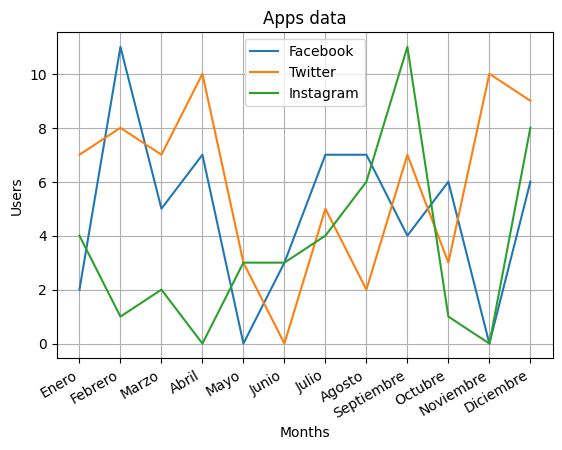

In [29]:
# Your solution HERE !!!!
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
Y0, Y1, Y2 = [np.random.randint(12, size = (12)) for _ in range(3)]

fig, axis = plt.subplots(1,1)

axis.plot(months, Y0, label = 'Facebook',)
axis.plot(months, Y1, label = 'Twitter')
axis.plot(months, Y2, label = 'Instagram')

axis.legend(loc = 'best')

axis.set_title('Apps data')
axis.set_xlabel('Months')
axis.set_ylabel('Users')

fig.autofmt_xdate()

plt.grid()
plt.show() 
